In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 16})
# TUDelft colors palette
colors = ["#0C2340","#00B8C8","#0076C2","#6F1D77","#EF60A3","#A50034","#E03C31","#EC6842","#FFB81C","#6CC24A","#009B77"]

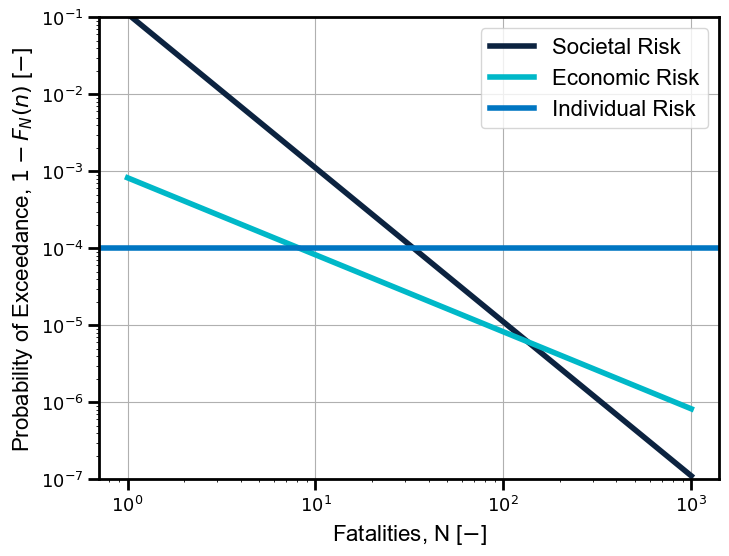

In [11]:
# -----------------------------------------------------------------
plot_title                  = ""
font                        = "Arial"
x_label                     = "Fatalities, N [$-$]"
y_label                     = "Probability of Exceedance, $1-F_N(n)$ [$-$]"
legend                      = True
grid                        = True
save_svg                    = True
remove_ticks                = False
remove_ticks_labels         = False
file_name                   = "../book/figures/risk_types"
# -----------------------------------------------------------------

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot() # axes_class=AxesZero)
ax.set_title(plot_title, fontfamily=font)
ax.set_xlabel(x_label, fontfamily=font)
ax.set_ylabel(y_label, fontfamily=font)

plt.setp(ax.spines.values(), linewidth=2)
# ax.spines["left"].set_position(("data", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["top"].set_position(("data", 1))
# ax.spines["right"].set_position(("data", 100))

# not a permanent solution (removed the part below 0)
# ---> find a better way to auto set upper bound
# ax.spines.bottom.set_bounds(0, 100)
# ax.spines.left.set_bounds(0, 1.0)
# ax.spines.top.set_bounds(0, 100)
# ax.spines.right.set_bounds(0, 1.0)

# Given Parameters

N_fatalities = np.linspace(1,1000,1000)  # fatalities

P_df = 0.1; beta = 0.1

alpha = 2
k = 3
N_A = 100

r= 0.025
I = 5*10**6
B = 0.33

# Individual Risk

Pf_ind_risk = (beta*(10**-4))/P_df  # per year

# print('Acceptable Failure Probability: ', Pf_ind_risk)

# Societal Risk

C = ((beta*100)/(k*np.sqrt(N_A)))**2  # binomial distribution

Pf_SR = (C/(N_fatalities**alpha))

# Economic Risk

D_damage = (5*10**7)*N_fatalities

Pf_ER = (I*B*r)/(D_damage)

# Visualize

# plotting
ax.plot(N_fatalities, Pf_SR, label='Societal Risk', color=colors[0], linewidth=4)
ax.plot(N_fatalities,Pf_ER, label='Economic Risk', color=colors[1], linewidth=4)
ax.axhline(Pf_ind_risk, label='Individual Risk', color=colors[2], linewidth=4)

# ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
# ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(10**(-7),.1)
# ax.set_yticks([10**(-7),10**(-5),10**(-3),10**(-1)])

ax.tick_params(axis='x', labelsize=13, width=2, length=8)
ax.tick_params(axis='y', labelsize=13, width=2, length=8)

if grid: ax.grid()
if legend: ax.legend(prop={"family":font})
if remove_ticks: ax.set_xticks([]); ax.set_yticks([])
if remove_ticks_labels: ax.set_xticklabels([]); ax.set_yticklabels([])
if save_svg: plt.savefig(file_name + '.svg')